In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
bike_day = pd.read_csv('Bike-Sharing-Dataset/day.csv')
bike_hour = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [3]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_day.shape

(731, 16)

In [6]:
bike_hour.shape

(17379, 17)

In [65]:
numeric_vars = ['instant','season','mnth','temp','atemp', 'hum', 'windspeed', 'hr']
categorical_vars = ['workingday', 'weekday', 'holiday']

Text(0, 0.5, 'rentals')

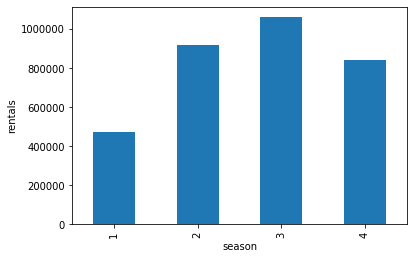

In [34]:
agg = bike_day.groupby('season')['cnt'].sum()
agg.plot(kind='bar').set_ylabel('rentals')

Text(0, 0.5, 'rentals')

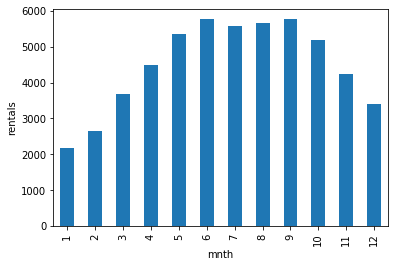

In [35]:
agg = bike_day.groupby('mnth')['cnt'].mean()
agg.plot(kind='bar').set_ylabel('rentals')

In [36]:
import statsmodels.api as sm
X = pd.DataFrame({'temp' : bike_day['cnt']})
X = sm.add_constant(X)
y = bike_day['temp']
X['temp-squared'] = X['temp'].apply(lambda x: x*x) #explicitly makes new column
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

/Users/cristinasandoval/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     270.0
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.89e-88
Time:                        12:24:11   Log-Likelihood:                 407.31
No. Observations:                 731   AIC:                            -808.6
Df Residuals:                     728   BIC:                            -794.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0986      0.024      4.084      0.000       0.051       0.146
temp             0.0001   1.15e-05     11.348      0.000       0.000       0.000
temp-squared -8.044e-09   1.26e-09     -6.383      0.000   -1.05e-08   -5.57e-09
==============================================================================
Omnibus:                       17.926   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.676
Skew:                           0.207   Prob(JB):                      0.00177
Kurtosis:                       2.505   Cond. No.                     1.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
bike_day.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455


In [64]:
bike_hour.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


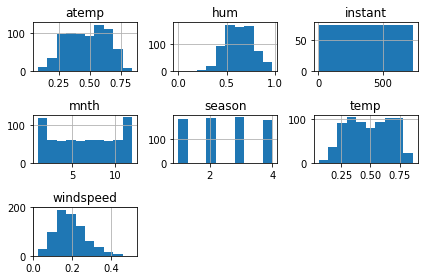

In [39]:
ax = bike_day[numeric_vars].hist(bins=10)
plt.tight_layout()

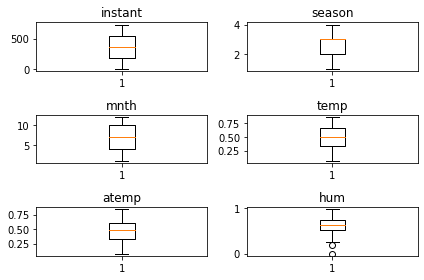

In [40]:
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), numeric_vars):
    ax.boxplot(bike_day[var])
    ax.set_title(var)
plt.tight_layout()

In [42]:
import statsmodels.api as sm
X = pd.DataFrame({'temp' : bike_day['cnt']})
X = sm.add_constant(X)
y = bike_day['temp']
X['temp-squared'] = X['temp'].apply(lambda x: x*x) #explicitly makes new column
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     270.0
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.89e-88
Time:                        12:24:39   Log-Likelihood:                 407.31
No. Observations:                 731   AIC:                            -808.6
Df Residuals:                     728   BIC:                            -794.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0986      0.024      4.084      0.000       0.051       0.146
temp             0.0001   1.15e-05     11.348      0.000       0.000       0.000
temp-squared -8.044e-09   1.26e-09     -6.383      0.000   -1.05e-08   -5.57e-09
==============================================================================
Omnibus:                       17.926   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.676
Skew:                           0.207   Prob(JB):                      0.00177
Kurtosis:                       2.505   Cond. No.                     1.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6648.421052631579 232.315789473684


(0.2, 0.4375)

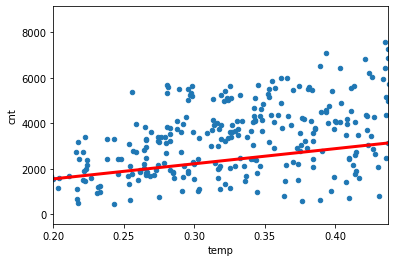

In [68]:
# Make a guess at the line of best fit
first_point = [.2, 1562]
second_point = [0.437500,3141]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)

print(slope, intercept)

# Plot the line along with the data
ax = bike_day.plot('temp','cnt',kind='scatter')
xx = np.linspace(.2, 0.437500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([.2, 0.437500])

In [72]:
import statsmodels.formula.api as smf
linear_model = smf.ols(formula='cnt ~ temp + mnth + season + hum', data=bike_day)
fitted_model = linear_model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     172.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.23e-103
Time:                        15:38:05   Log-Likelihood:                -6325.9
No. Observations:                 731   AIC:                         1.266e+04
Df Residuals:                     726   BIC:                         1.268e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2311.0921    260.881      8.859      0.000    1798.921    2823.263
temp        5984.3902    301.222     19.867      0.000    5393.020    6575.760
mnth         -24.5158     27.162     -0.903      0.367     -77.842      28.810
season       522.2285     86.917      6.008      0.000     351.590     692.867
hum        -3050.3002    372.201     -8.195      0.000   -3781.020   -2319.581
==============================================================================
Omnibus:                        6.256   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.560
Skew:                           0.051   Prob(JB):                        0.102
Kurtosis:                       2.627   Cond. No.                         66.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
X = pd.DataFrame({'temp' : bike_day['temp'], 'hum': bike_day['hum'],'mnth': bike_day['mnth'] })
linear_model = smf.ols(formula='temp ~ weight + I(weight**2)',
                       data=X)
fitted_model = linear_model.fit()
fitted_model.summary()